In [1]:
import pandas as pd
nsfg = pd.read_hdf('nsfg.hdf5')

# Display the number of rows and columns
print(nsfg.shape)

# Display the names of the columns
print(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [2]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
nsfg['nbrnaliv'].isnull().sum()

2873

In [4]:
import numpy as np
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8],  np.nan,inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [5]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


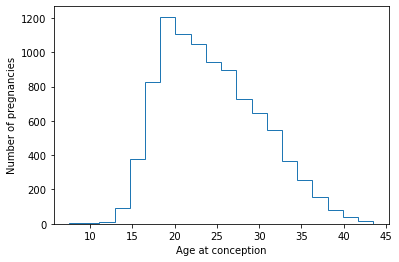

In [6]:

import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(agecon, bins=20, histtype ='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [7]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns: 
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [9]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [10]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth']>= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.450551372896369


In [11]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv']==1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.4535149455074725
Multiple full-term mean: 5.959821428571429


In [12]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [13]:
gss = pd.read_hdf('gss.hdf5')

In [14]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [15]:
from empiricaldist import Pmf
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


In [16]:
age = gss['age']==23

In [17]:
age

0        False
1        False
2        False
3        False
4        False
         ...  
62461    False
62462    False
62463    False
62464    False
62465    False
Name: age, Length: 62466, dtype: bool

In [18]:
aged=gss[age]

In [19]:
aged[17:470]

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
996,1972,23.0,1949.0,2,1,12.0,18951.0,1.0,NaN,0.8893
1039,1972,23.0,1949.0,2,2,12.0,13537.0,2.0,NaN,0.8893
1078,1972,23.0,1949.0,2,1,12.0,18951.0,1.0,NaN,0.8893
1185,1972,23.0,1949.0,2,1,12.0,30458.0,1.0,NaN,0.8893
1219,1972,23.0,1949.0,2,1,15.0,37226.0,2.0,NaN,1.3339
...,...,...,...,...,...,...,...,...,...,...
17539,1985,23.0,1962.0,1,1,12.0,44863.0,2.0,NaN,1.5544
17572,1985,23.0,1962.0,1,1,12.0,22432.0,1.0,NaN,1.0363
17614,1985,23.0,1962.0,2,1,13.0,6861.0,1.0,NaN,1.0363
17686,1985,23.0,1962.0,1,1,12.0,24543.0,1.0,NaN,1.0363


In [24]:
# Make a PMF of age
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
import statistics
pmf_age = Pmf(age,normalize=True)

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [20]:
# pmf_age

In [25]:
# Plot the PMF
pmf_age.bar(label = 'age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

NameError: name 'pmf_age' is not defined

In [26]:
from empiricaldist import Cdf
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age[30])

27.0


In [27]:
# Calculate the 75th percentile 
cdf_income = Cdf(gss['realinc'])
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

In [28]:
iqr

0.0

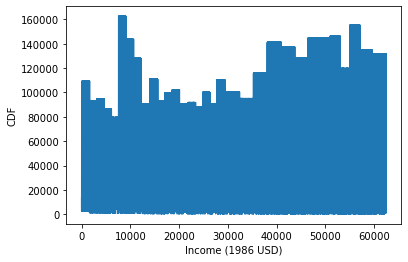

In [25]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

In [29]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >=14) & (educ < 16)
print(gss[assc])

# High school (12 or fewer years of education)
high = (educ <=12)
print(high.mean())

       year   age  cohort  sex  race  educ  realinc  gunlaw  grass   wtssall
3      1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN  0.889300
19     1972  22.0  1950.0    1     1  15.0  50763.0     1.0    NaN  1.778600
22     1972  64.0  1908.0    1     1  15.0  18951.0     1.0    NaN  0.889300
26     1972  24.0  1948.0    2     2  14.0  18951.0     1.0    NaN  0.889300
31     1972  20.0  1952.0    1     1  14.0  60915.0     2.0    NaN  1.778600
...     ...   ...     ...  ...   ...   ...      ...     ...    ...       ...
62438  2016  24.0  1992.0    2     1  14.0   8775.0     2.0    1.0  0.956994
62454  2016  36.0  1980.0    1     2  14.0  31590.0     NaN    2.0  0.782182
62456  2016  24.0  1992.0    2     2  15.0  12870.0     1.0    1.0  0.478497
62458  2016  21.0  1995.0    2     3  15.0   5265.0     NaN    1.0  1.435490
62459  2016  66.0  1950.0    1     3  14.0   8775.0     2.0    1.0  0.478497

[9816 rows x 10 columns]
0.5308807991547402


In [30]:
income = gss['realinc']
pre95 = income < 95

In [31]:
pre95

0        False
1        False
2        False
3        False
4        False
         ...  
62461    False
62462    False
62463    False
62464    False
62465    False
Name: realinc, Length: 62466, dtype: bool

In [32]:
~pre95

0        True
1        True
2        True
3        True
4        True
         ... 
62461    True
62462    True
62463    True
62464    True
62465    True
Name: realinc, Length: 62466, dtype: bool

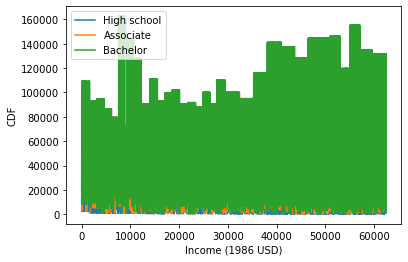

In [33]:
income = gss['realinc']
# pre95 = income < 95

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [34]:
gss['realinc']

0        13537.0
1        18951.0
2        30458.0
3        37226.0
4        30458.0
          ...   
62461    74880.0
62462    65520.0
62463        NaN
62464     9945.0
62465    38610.0
Name: realinc, Length: 62466, dtype: float64

In [36]:
gss['realinc']

0        13537.0
1        18951.0
2        30458.0
3        37226.0
4        30458.0
          ...   
62461    74880.0
62462    65520.0
62463        NaN
62464     9945.0
62465    38610.0
Name: realinc, Length: 62466, dtype: float64

In [37]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [39]:
gss.loc[:,['realinc']]

,realinc
0,13537.0
1,18951.0
2,30458.0
3,37226.0
4,30458.0
...,...
62461,74880.0
62462,65520.0
62463,NaN
62464,9945.0


In [40]:
from scipy.stats import norm

In [34]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290082383271419


<AxesSubplot:ylabel='Frequency'>

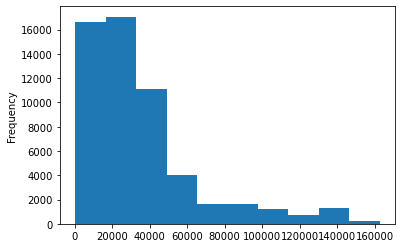

In [35]:
income.plot(kind='hist')

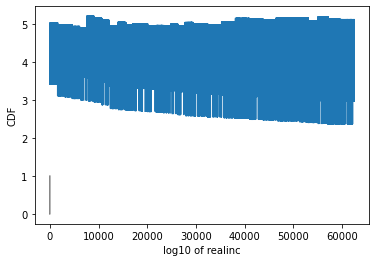

In [36]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

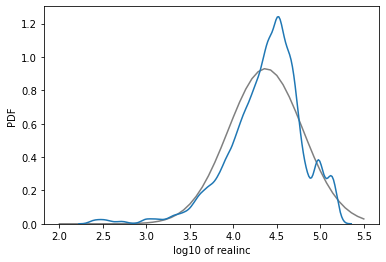

In [37]:
# Evaluate the normal PDF
import seaborn as sns 
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

In [38]:
brfss = pd.read_hdf('brfss.hdf5')

In [39]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


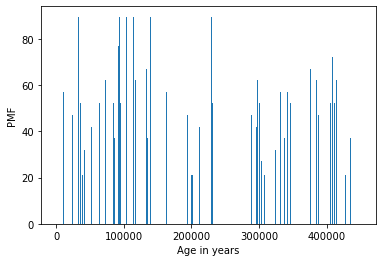

In [41]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

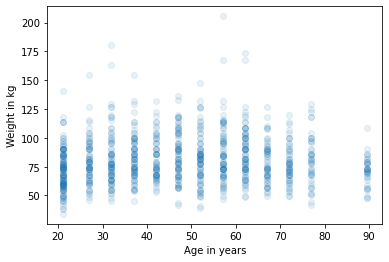

In [42]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight,'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

        SEX   HTM4   WTKG3  INCOME2       _LLCPWT  _AGEG5YR  _VEGESU1  \
96230   2.0  160.0   60.33      8.0   1398.525290       6.0      2.14   
244920  2.0  163.0   58.97      5.0     84.057503      13.0      3.14   
57312   2.0  163.0   72.57      8.0    390.248599       5.0      2.64   
32573   2.0  165.0   74.84      1.0  11566.705300       3.0      1.46   
355929  2.0  170.0  108.86      3.0    844.485450       3.0      1.81   

        _HTMG10   AGE  
96230     150.0  47.0  
244920    160.0  89.5  
57312     160.0  42.0  
32573     160.0  32.0  
355929    160.0  32.0  


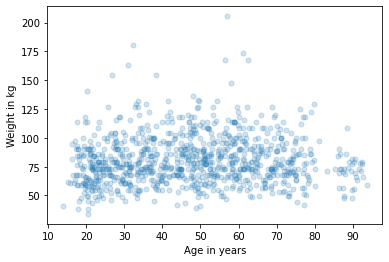

In [55]:
# Select the first 1000 respondents
brfss = brfss[:1000]
print(brfss.head())
# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size = len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight,  'o', markersize = 5, alpha = 0.2)



plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

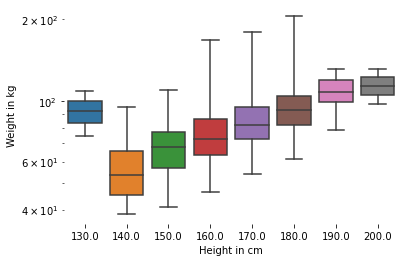

In [45]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3',data=data, whis=10)

# Plot the y-axis on a log scale

plt.yscale('log')
# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


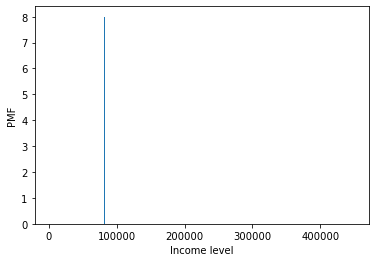

In [46]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

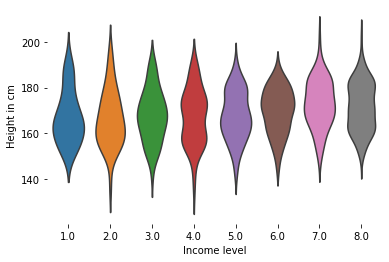

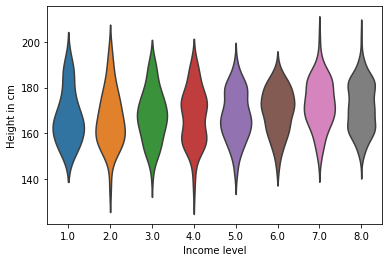

In [47]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()
plt.clf()
sns.violinplot(x='INCOME2',y='HTM4',data=data,inner=None)

# Remove unneeded lines and label axes
# sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

In [48]:
columns = brfss[['AGE', 'INCOME2','_VEGESU1']]

In [49]:
columns

,AGE,INCOME2,_VEGESU1
96230,47.0,8.0,2.14
244920,89.5,5.0,3.14
57312,42.0,8.0,2.64
32573,32.0,1.0,1.46
355929,32.0,3.0,1.81
...,...,...,...
35187,57.0,8.0,3.17
73031,57.0,8.0,1.72
47807,37.0,6.0,3.40
57272,32.0,8.0,1.38


In [70]:
# Select columns
columns = ['AGE', 'INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


In [71]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


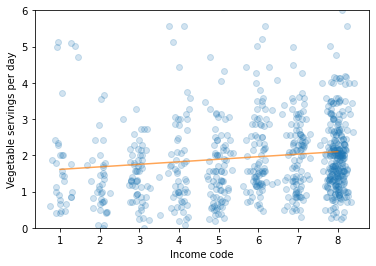

In [72]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

In [73]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [76]:
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1~INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


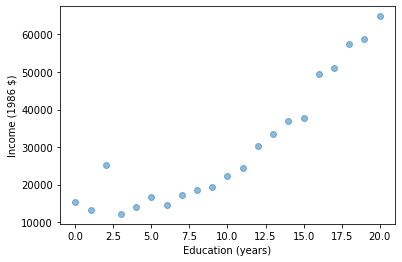

In [77]:
# Note, the regression and correlation cannot measure non-linear relationship.
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [79]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [80]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()
print(results.params)
# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64
0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


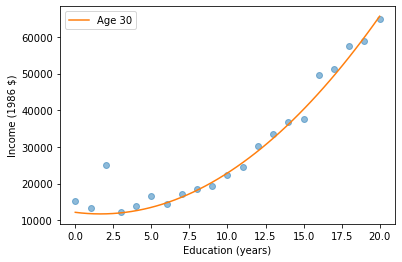

In [81]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [84]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)
gss['grass'].value_counts()


# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)',data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [85]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


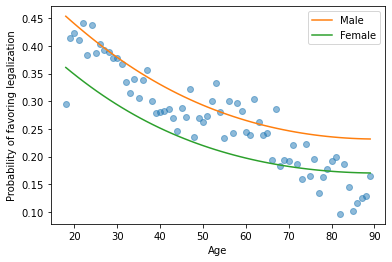

In [86]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

In [ ]:
#  Note use cdf for exploration
# use Pmf if there are a small number of unique Value
#  use Kdf if there are a lot of values